# Chapter 3

In [106]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

**Exercise 3.1:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [51]:
resp['numkdhh'].head(10) #Used to get idea of what numkdhh (number of kids per household) data looks like

0    3
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    2
9    0
Name: numkdhh, dtype: int64

In [58]:
# Get instance of class Pmf - applies probabilty mass function on numkdhh variable
pmf = thinkstats2.Pmf(resp.numkdhh, label='actual') 

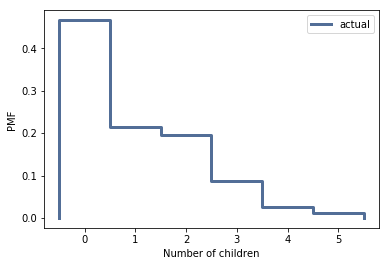

In [59]:
# Create histogram of number of kids per household
thinkplot.Pmf(pmf) 
# Modify histogram to add x & y axis labels
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [60]:
# Because there are more children answering the survey in families with more children, we need to un-bias the data

#Define BiasPmf Function
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label) #create a copy of pmf data

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)  #multiply each num kids per household by num kids per household
        
    new_pmf.Normalize() #set the new_pmf's total back to 1
    return new_pmf

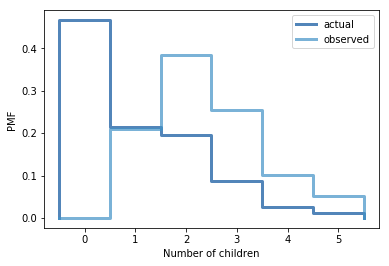

In [61]:
# Plot the actual and observed data
biased = BiasPmf(pmf, label='observed') #This represents the biased distribution
thinkplot.PrePlot(num=2) #sets number of lines that will be plotted
thinkplot.Pmfs([pmf, biased]) # plots pmf & biased data
thinkplot.Config(xlabel='Number of children', ylabel='PMF') # add x & y labels 

In [55]:
# Get mean of pmf data
pmf.Mean()

1.024205155043831

**Exercise 3.2:**  Write functions called PMFMean & PMFVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf


In [62]:
# Creates a function that computes the mean of a PMF. Returns a float as the mean
def PMFMean(self):     
    return sum(p * x for x, p in self.Items())

In [63]:
# Creat a function that computes the variance of a PMF. Returns a float as the variance
def PMFVar(self, mu=None):
    if mu is None:
        mu = self.Mean()
    return sum(p * (x-mu)**2 for x, p in self.Items())

In [87]:
# Check output of PMF Mean function
print("PMFMean(pmf)= "+ str(PMFMean(pmf)))
print("pmf.Mean()  = "+ str(pmf.Mean()))

if (PMFMean(pmf) == pmf.Mean()):
    print("Output of PMFMean(pmf) matches output of pmf.Mean()")
else:
    print("Ouputs do not match")

PMFMean(pmf)= 1.024205155043831
pmf.Mean()  = 1.024205155043831
Output of PMFMean(pmf) matches output of pmf.Mean()


In [89]:
# Check output of PMF Variance function
print("PMFVar(pmf)= "+ str(PMFVar(pmf)))
print("pmf.Var()  = "+ str(pmf.Var()))

if (PMFVar(pmf) == pmf.Var()):
    print("Output of PMFVar(pmf) matches output of pmf.Var()")
else:
    print("Ouputs do not match")

PMFVar(pmf)= 1.4128643263531195
pmf.Var()  = 1.4128643263531195
Output of PMFVar(pmf) matches output of pmf.Var()


# Chapter 4

**Exercise 4.1**: How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [91]:
#computes the cumulative distribution function for the weights of first-borns
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
#computes the cumulative distribution function for the weights of non-first borns
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other') 

In [101]:
# I was not the first born, so I will use the other_cdf 

other_cdf.PercentileRank(8.6)

83.80748663101605

**Exercise**: The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [102]:
# Generate 1K random numbers

t = np.random.random(1000)

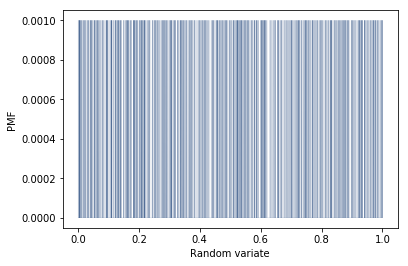

In [103]:
# Solution
# applies probabilty mass function on t variable
pmf = thinkstats2.Pmf(t)
# plot pmf data
thinkplot.Pmf(pmf, linewidth=0.1)
# Label x & y axis
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

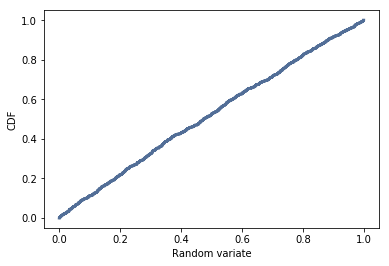

In [105]:
# Apply cumulatitive distribution lfunction and to t data and set to cdf dataset
cdf = thinkstats2.Cdf(t) 
# Plot cdf dataset
thinkplot.Cdf(cdf)
# Add x & y labels to graph
thinkplot.Config(xlabel='Random variate', ylabel='CDF')

Since the distribution is approximately a straight line, the distribution is normal